In [1]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn


In [3]:
# Load dataset
credit = pn.read_csv("creditcard.csv")

In [5]:
print(credit.shape)

(284807, 31)


In [6]:
print(credit.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

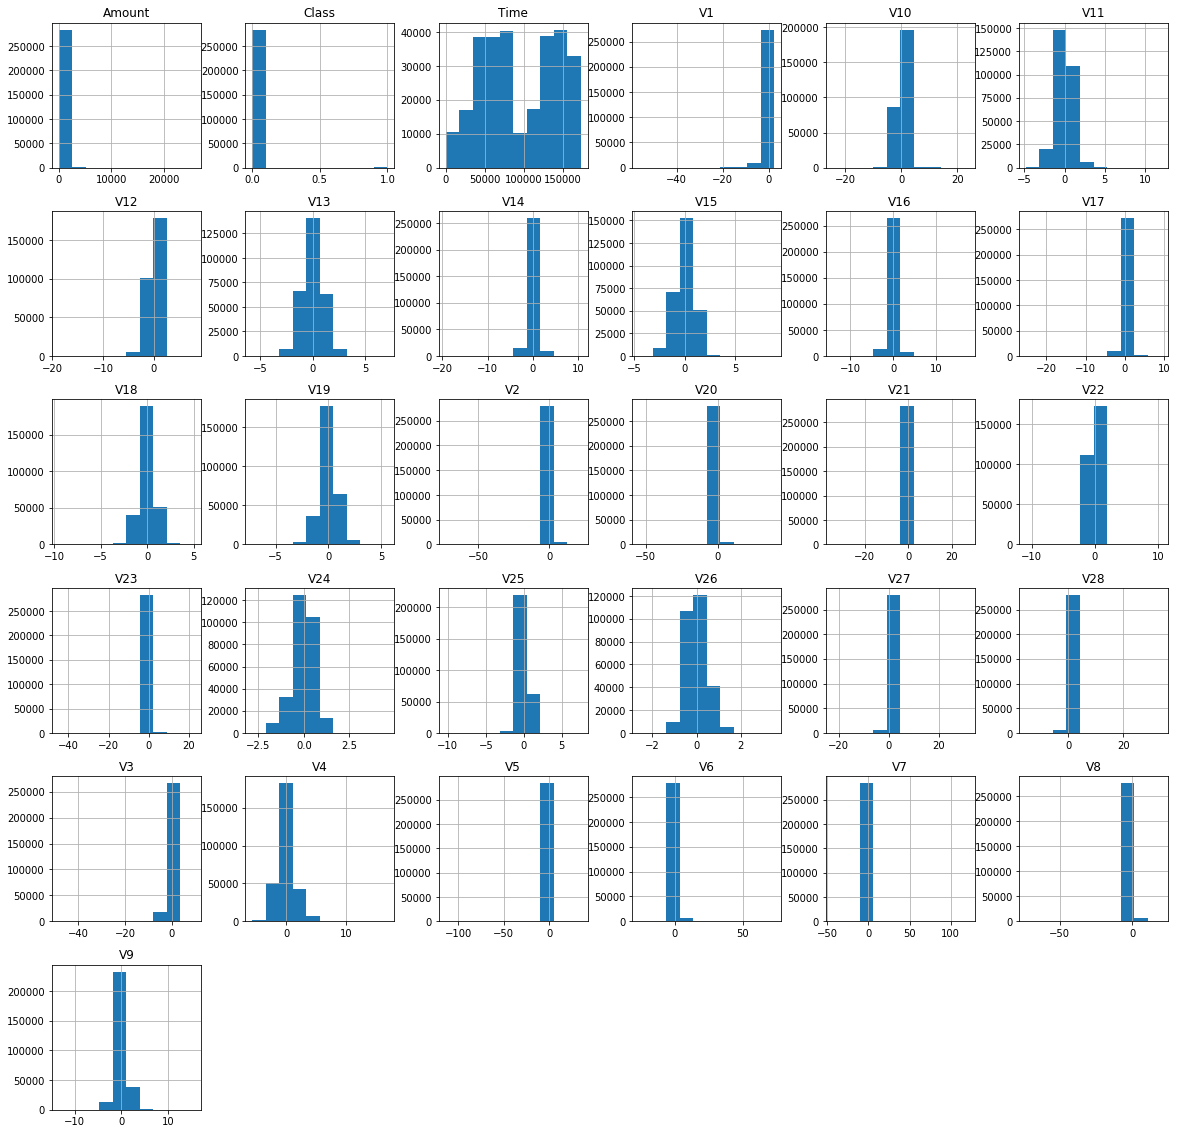

In [7]:
#ploting a histogram
credit.hist(figsize= (20,20))
plt.show()

In [8]:
#Determine number of fraud cases in dataset
fraud = credit[credit['Class'] == 1]
valid = credit[credit['Class'] == 0]
outlier_fr = len(fraud)/float(len(valid))
len(valid)

284315

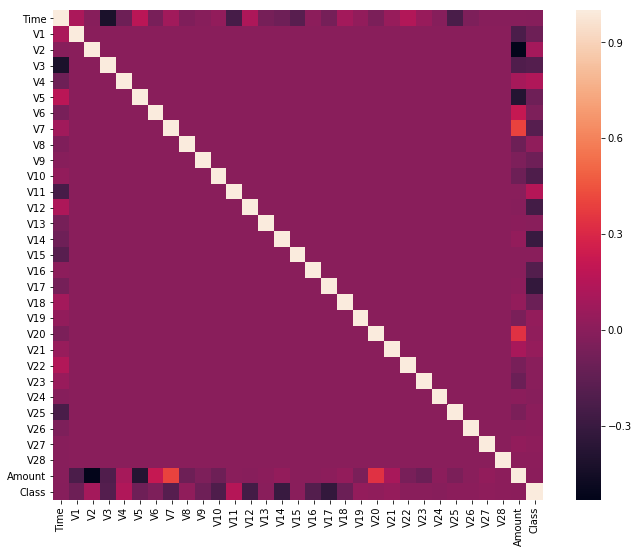

In [9]:
corrmat = credit.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax= 1 , square = True)

In [10]:
clms = credit.columns.tolist()
clms = [c for c in clms if c not in ["Class"]]

target = "Class"

X = credit[clms]
Y = credit[target]

In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

classifier ={
    'Isolation Forest': IsolationForest(behaviour='new', max_samples=len(X), contamination= outlier_fr, random_state=1),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination = outlier_fr)
}

In [17]:
n_outliers =len(fraud)

for i, (clf_name, clf) in enumerate(classifier.items()):
    
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        score_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scofe_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    y_pred[y_pred == 1]=0
    y_pred[y_pred == -1]=1
    
    n_errors = (y_pred != Y).sum()
    
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

